# Figure 5: TCC II for Sweden
With this jupyter notebook you can generates Figure 5 of:  van der Most et al. Temporally compounding energy droughts in European electricity systems with hydropower

In [1]:
# General packages
import os
import sys
import pandas as pd
import xarray as xr
import numpy as np
from calendar import monthrange
import calendar

# Plotting packages
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import seaborn as sns
import geopandas as gpd
import cartopy
import cartopy.io.shapereader as shapereader
import cartopy.crs as ccrs
import string

# Load color settings
import color_settings as cs

# Configure matplotlib settings
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ["Helvetica", "Arial", "sans-serif"]
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.size'] = 5
mpl.rcParams['legend.fontsize'] = 5
mpl.rcParams['xtick.labelsize'] = 5
mpl.rcParams['ytick.labelsize'] = 5
mpl.rcParams['axes.linewidth'] = 0.5
mpl.rcParams['grid.linewidth'] = 0.5
mpl.rcParams['xtick.major.width'] = 0.6
mpl.rcParams['ytick.major.width'] = 0.6
mpl.rcParams['xtick.minor.width'] = 0.4
mpl.rcParams['ytick.minor.width'] = 0.4

# load data

In [2]:
# Load data
ifolder = 'data_for_images/'
mrro = xr.open_dataset(ifolder + 'fig5_mrro.nc')
mrso = xr.open_dataset(ifolder + 'fig5_mrso.nc')

# Load energy data
data = pd.read_csv(ifolder + 'fig5_events_reservoir_SWE.csv', index_col=0)
demdata = pd.read_csv(ifolder + 'fig5_events_demand_SWE_noanom.csv', index_col=0)
Eindata = pd.read_csv(ifolder + 'fig5_events_inflow_SWE_noanom.csv', index_col=0)

# Load additional data
dft = pd.read_csv(ifolder + 'fig5_yearly_demand_and_inflow_during_pois.csv').set_index(['runs', 'year'])

# Load risk ratio data
runname = 'LENTIS_PD_02_v4'
dfhm = pd.read_csv(ifolder + f'rr_spring_after_winter_events_poi_{runname}.csv', index_col=0)
dfhm = dfhm.drop('CHE')
dfSI = pd.read_csv(ifolder + f'statistical_significant_rr_spring_after_winter_events_poi_{runname}.csv', index_col=0)
dfSI = dfSI.drop('CHE')


# make plot

In [5]:
# settingsextension = 2000
# april mei juni inflow
pois = {'CHE': (90,150), 
             'FRA': (90,150),
             'ITA': (90,150),
             'SWE': (90,150), 
             'NOR': (90,150),
             'ESP': (90,150)
       }

colors_seasons = {
    'winter':'#0000FF',
    'summer': '#FFB14E',
    'all':'#E8246F',
}

country = 'SWE'

# Define colormaps
cmaps = {
    'tas': 'coolwarm',
    'sfcWind': 'PiYG',
    'rsds': 'PuOr',
    'mrro': 'RdGy',
    'mrso': 'BrBG'
}

extension = 2000

<ipython-input-6-dceda53e493c>:198: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  fig.tight_layout()
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Arial, sans-serif


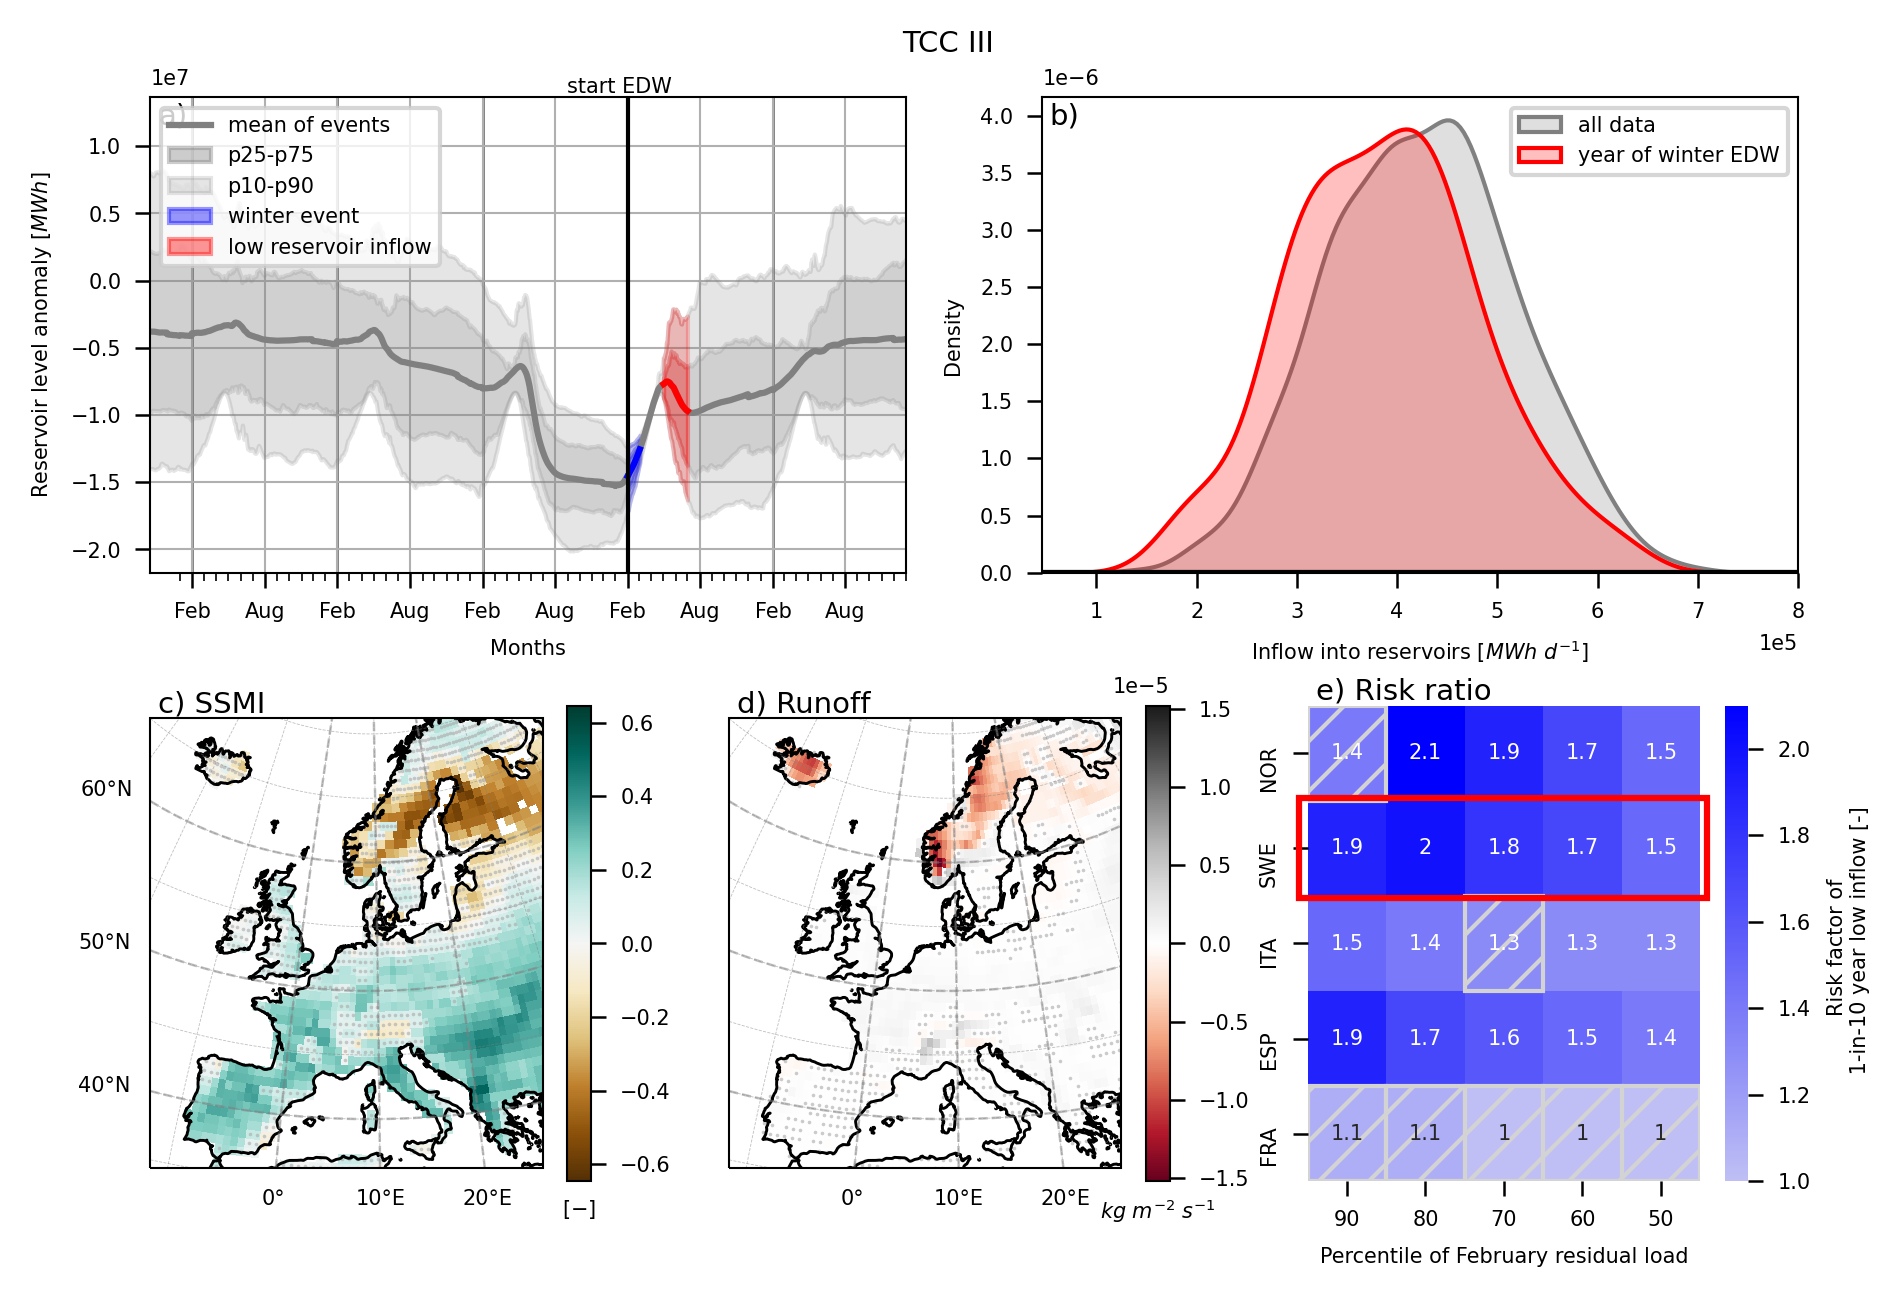

In [6]:

cmap = mcolors.LinearSegmentedColormap.from_list("", ["#bfbff5","#0000FF"])
levelsp = np.arange(990, 1030, 2.5)

# Load country borders shapefile
resolution = '10m'
category = 'cultural'
name = 'admin_0_countries'
shpfilename = shapereader.natural_earth(resolution, category, name)
df = gpd.read_file(shpfilename)

# Define figure size in millimeters and convert to inches
width_mm = 180
height_mm = (9.5 / 15) * 180
width_in = width_mm / 25.4
height_in = height_mm / 25.4

# Create figure and subplots
fig = plt.figure(figsize=(width_in, height_in), dpi=300)
fig.suptitle('TCC III', fontsize=7)

# Add subplots
ax0 = fig.add_subplot(2, 2, 1)
ax01 = fig.add_subplot(2, 2, 2)
ax1 = fig.add_subplot(2, 3, 4, projection=ccrs.EuroPP())
ax2 = fig.add_subplot(2, 3, 5, projection=ccrs.EuroPP())
ax3 = fig.add_subplot(2, 3, 6, projection=None)

# Plot reservoir level anomalies
dft2 = data.copy()
dft2['date_idx'] = np.arange(0, len(dft2)) - extension
dft2 = dft2.set_index('date_idx')
if sum([dft2.equals(demdata)]) != 0:
    dft2 = dft2.rolling(7).mean()

handles_list = []
labels_list = []

# Plot mean and quantiles
co = 'grey'
dft2.mean(axis=1).plot(legend=False, ax=ax0, color=co)
handles_list.append(mlines.Line2D([], [], color='grey', label='mean of events'))
labels_list.append('mean of events')

ax0.fill_between(dft2.index, dft2.quantile(0.75, axis=1), dft2.quantile(0.25, axis=1), color=co, alpha=0.2)
ax0.fill_between(dft2.index, dft2.quantile(0.9, axis=1), dft2.quantile(0.1, axis=1), color=co, alpha=0.2)
fill1_handle = mpatches.Patch(color='grey', alpha=0.4)
handles_list.append(fill1_handle)
labels_list.append('p25-p75')
fill2_handle = mpatches.Patch(color='grey', alpha=0.2)
handles_list.append(fill2_handle)
labels_list.append('p10-p90')

# Plot winter event overlay
co = colors_seasons['winter']
dft3 = dft2.loc[0:30]
dft3.mean(axis=1).plot(legend=False, ax=ax0, color=co)
ax0.fill_between(dft3.index, dft3.quantile(0.75, axis=1), dft3.quantile(0.25, axis=1), color=co, alpha=0.2)
ax0.fill_between(dft3.index, dft3.quantile(0.9, axis=1), dft3.quantile(0.1, axis=1), color=co, alpha=0.2)
fill1_handle = mpatches.Patch(color=co, alpha=0.4)
handles_list.append(fill1_handle)
labels_list.append('winter event')

# Plot low reservoir inflow
co = 'red'
dft3 = dft2.loc[pois[country][0]:pois[country][1]]
dft3.mean(axis=1).plot(legend=False, ax=ax0, color=co)
ax0.fill_between(dft3.index, dft3.quantile(0.75, axis=1), dft3.quantile(0.25, axis=1), color=co, alpha=0.2)
ax0.fill_between(dft3.index, dft3.quantile(0.9, axis=1), dft3.quantile(0.1, axis=1), color=co, alpha=0.2)
fill1_handle = mpatches.Patch(color=co, alpha=0.4)
handles_list.append(fill1_handle)
labels_list.append('low reservoir inflow')

ax0.set_axisbelow(True)
ax0.grid()

# Remove duplicate handles and labels
unique_handles_labels = dict(zip(labels_list, handles_list))
unique_handles = list(unique_handles_labels.values())
unique_labels = list(unique_handles_labels.keys())
ax0.legend(unique_handles, unique_labels, fontsize=5)

# Set monthly ticks
mls = [monthrange(2005, i)[1] for i in range(1, 13)]
mnms = [calendar.month_abbr[i] for i in range(1, 13)]
pos = np.cumsum([0] + mls + mls + mls + mls)
neg = np.cumsum([-x for x in mls] + [-x for x in mls] + [-x for x in mls])[::-1]
ticks = np.concatenate([neg, pos])[:-1] - 31
names = mnms * 7

for a in [ax0]:
    a.set_xticks(ticks, minor=True)
    a.set_xticks(ticks[1::6])
    a.set_xticklabels(names[1::6])
    for y in range(-3, 4):
        a.axvline(y * 365, color='grey', linewidth=0.7, zorder=-1)
    a.set_xlim(-1200, 700)
    a.set_xlabel('Months')
    a.set_ylabel('Reservoir level anomaly [$MWh$]')

ax0.text(0.62, 1, 'start EDW', horizontalalignment='center', verticalalignment='bottom', transform=ax0.transAxes, color='black')
ax0.axvline(0, color='black', linewidth=1)

# KDE plot for inflow data
c = 'SWE'
dft = dft.reset_index()[['Ein', 'netto_demand']]
ys = dft.Ein.values
sns.kdeplot(ys, color='grey', ax=ax01, shade=True, label='all data')

l = []
for dft2 in [Eindata, demdata]:
    dft2['date_idx'] = np.arange(0, len(dft2)) - extension
    dft2 = dft2.set_index('date_idx')
    dft2 = dft2.loc[pois[c][0]:pois[c][1]].mean()
    l.append(dft2)
dft2 = pd.concat(l, axis=1)
dft2.columns = ['Ein', 'netto_demand']
ys2 = dft2.Ein.values
sns.kdeplot(ys2, color='red', ax=ax01, shade=True, label='year of winter EDW')
ax01.legend()
ax01.ticklabel_format(style='sci', scilimits=(-3, 4), axis='y')
ax01.ticklabel_format(style='sci', scilimits=(-3, 4), axis='x')
ax01.set_xlabel('Inflow into reservoirs [$MWh$ $d^{-1}$]')
ax01.set_ylabel('Density')
ax01.axhline(0, color='black')

# Plot soil moisture data
pcm = mrso.mrso.plot(ax=ax1, cmap=cmaps['mrso'], add_colorbar=False, add_labels=False, transform=ccrs.PlateCarree())
dft = mrso.sign.to_dataframe().reset_index()
dft = dft.loc[dft.sign, :]
non_significant_lon = dft.lon.values
non_significant_lat = dft.lat.values
ax1.scatter(non_significant_lon, non_significant_lat, color='darkgrey', s=3, marker='.', edgecolor=None, facecolor=None, transform=ccrs.PlateCarree(), alpha=0.6, lw=0)
ax1.coastlines(resolution='50m', linewidth=0.7)
gl0 = ax1.gridlines(draw_labels=False, linewidth=0.2, color='gray', alpha=0.5, linestyle='--')
gl = ax1.gridlines(draw_labels=False, linewidth=0.6, color='gray', alpha=0.5, linestyle='--', x_inline=False)
gl.xlabel_style = {'size': 5, 'rotation': 0}
gl.ylabel_style = {'size': 5, 'rotation': 0}
gl.xlocator = plt.FixedLocator([0, 10, 20])
gl.ylocator = plt.FixedLocator([40, 50, 60])
gl.bottom_labels = True
gl.left_labels = True
cbar = plt.colorbar(pcm, ax=ax1, shrink=1)
cbar.ax.set_xlabel('[$-$]')
ax1.set_xlabel(f'SMDI in May')

# Plot runoff data
pcm = mrro.mrro.plot(ax=ax2, cmap=cmaps['mrro'], add_colorbar=False, add_labels=False, transform=ccrs.PlateCarree())
dft = mrro.sign.to_dataframe().reset_index()
dft = dft.loc[dft.sign, :]
non_significant_lon = dft.lon.values
non_significant_lat = dft.lat.values
ax2.scatter(non_significant_lon, non_significant_lat, color='darkgrey', s=3, marker='.', edgecolor=None, facecolor=None, transform=ccrs.PlateCarree(), alpha=0.6, lw=0)
ax2.coastlines(resolution='50m', linewidth=0.7)
cbar = plt.colorbar(pcm, ax=ax2, shrink=1)
cbar.ax.set_xlabel('$kg$ $m^{-2}$ $s^{-1}$')
ax2.set_xlabel(f'Runoff anomalies')
gl0 = ax2.gridlines(draw_labels=False, linewidth=0.2, color='gray', alpha=0.5, linestyle='--')
gl = ax2.gridlines(draw_labels=False, linewidth=0.6, color='gray', alpha=0.5, linestyle='--', x_inline=False)
gl.xlabel_style = {'size': 5, 'rotation': 0}
gl.ylabel_style = {'size': 5, 'rotation': 0}
gl.xlocator = plt.FixedLocator([0, 10, 20])
gl.ylocator = plt.FixedLocator([40, 50, 60])
gl.bottom_labels = True

# Plot heatmap
dfhm = dfhm.round(1)
axhm = sns.heatmap(dfhm, annot=True, ax=ax3, cbar_kws={'label': 'Risk factor of \n 1-in-10 year low inflow [-]'}, cmap=cmap)
for y in range(dfSI.shape[0]):
    for x in range(dfSI.shape[1]):
        if dfSI.iloc[y, x]:
            plt.gca().add_patch(Rectangle((x, y), 1, 1, fill=False, hatch='//', edgecolor='lightgrey'))
axhm.figure.axes[-1].yaxis.label.set_size(5)
ax3.set_xticklabels([90, 80, 70, 60, 50])
axhm.set_xlabel(f'Percentile of February residual load')

# Set subplot titles and labels
title = ['SSMI', 'Runoff ', 'Risk ratio']
for ax in [ax1, ax2, ax3]:
    ax.set_title(' ')
for n, ax in enumerate([ax0, ax01, ax1, ax2, ax3]):
    if ax == ax0:
        ax.text(0.01, 0.99, string.ascii_lowercase[n] + ')', ha='left', va='top', transform=ax.transAxes, size=7)
    elif ax == ax01:
        ax.text(0.01, 0.99, string.ascii_lowercase[n] + ')', ha='left', va='top', transform=ax.transAxes, size=7)
    elif ax == fig.axes[-1]:
        continue
    else:
        ax.text(0.02, 1, string.ascii_lowercase[n] + ') ' + title[n - 2], ha='left', va='bottom', transform=ax.transAxes, size=7)

# Add rectangle to heatmap
ax = fig.add_subplot(2, 2, 4, projection=None)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_zorder(1000)
ax.axis('off')
ax.add_patch(Rectangle((0.34, 0.595), 0.54, 0.21, fill=None, alpha=1, transform=ax.transAxes, color='red', linewidth=1.5))

fig.tight_layout()
fig.subplots_adjust(hspace=0.28, wspace=0.18)
plt.subplots_adjust(top=0.93)
plt.show()
